In [1]:
head(iris)
# species를 타겟,  species에 있는것을 샘플.  나머지 열은 feature
# iris는 지도학습. - 값이 지정되어있으니까 객관식 지도학습(classification)
# 주관식은 regretion

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
# 학습용 데이터와 검증용 데이터 분리 7:3정도로분리
set.seed(1234)
samp <- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
samp


[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [4]:
# 학습용 데이터 셋
data.tr <- iris[samp,]

# 검증용 데이터 셋
data.test <- iris[-samp,]

In [6]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

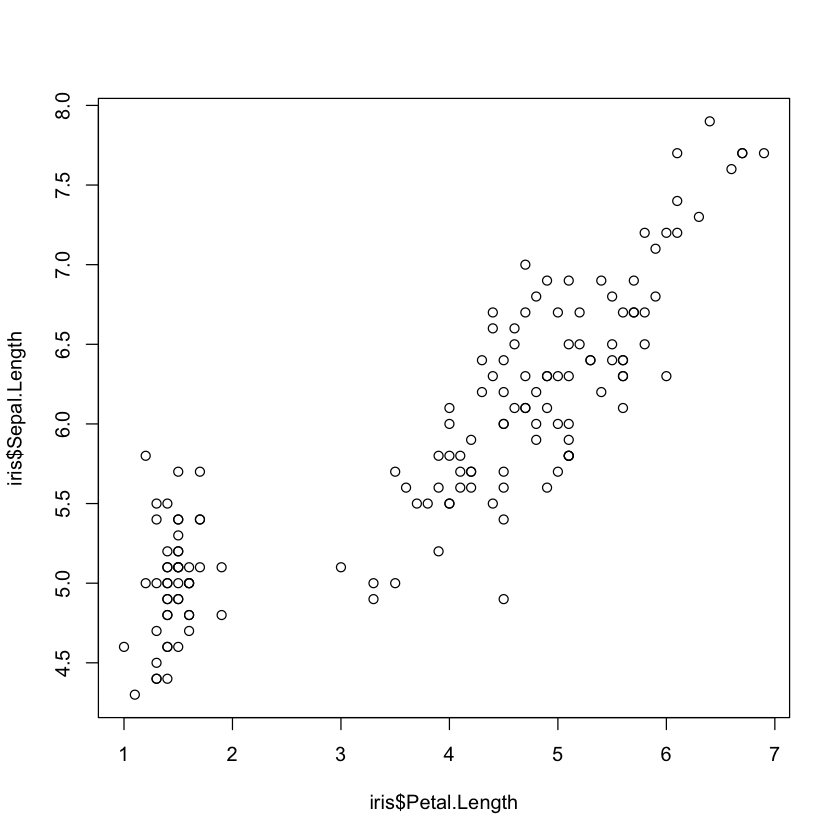

In [10]:
par(bg='white')
plot(iris$Petal.Length,iris$Sepal.Length)  ##데이터끼리 몰려있으면 KNN가능. 근처 이웃으로 판단

In [13]:
# tranning data 준비
data.training = subset(data.tr,select= -Species)
data.training.label = data.tr$Species

In [14]:
# 문제 및 정답 만들기
x <- subset(data.test,select = -Species)
y <- data.test$Species

# 학습시키기

In [15]:
# 모델 불러오기(KNN)
library(class)

In [16]:
# k=3으로 (Hyper Parameter 조정)
iris_knn <- knn(train = data.training,test=x,cl = data.training.label,k=3)

In [19]:
# 예측값과 정답값의 비교
mean(y == iris_knn) #95점 95%맞춘다.

[1] 0.9555556

In [20]:
#정오표 확인
table(y,iris_knn)

            iris_knn
y            setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          0        15